In [1]:
pip install pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


Accuracy: 81.43653656936701%


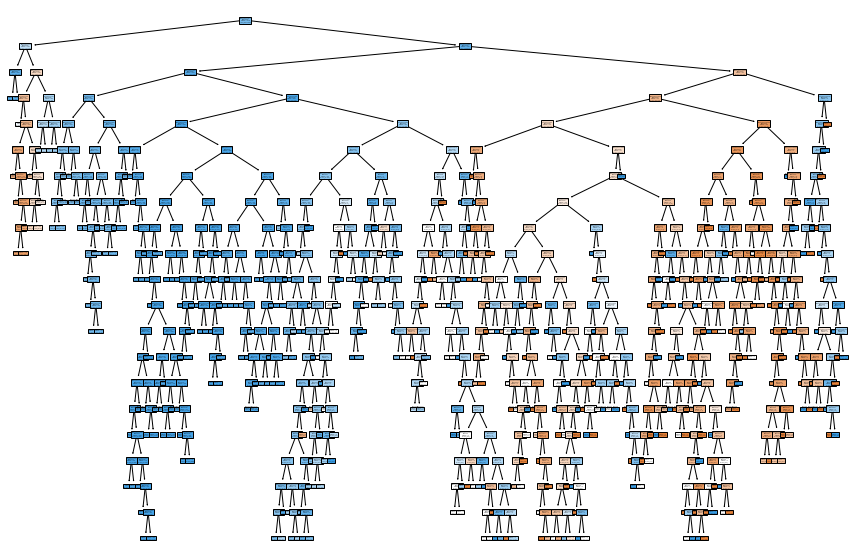

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('FakeNewsNet.csv')
df_pulito = df.dropna()
df_pulito.to_csv("df_pulito.csv", index = False, sep = ",")

y = df_pulito['real']#TARGET
X = df_pulito.drop("real", axis = 1) #FEATURE

# Identifichiamo le colonne non numeriche (testo)
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Identifichiamo le colonne numeriche
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Creiamo un nuovo dataframe X contenente solo le colonne numeriche
if len(numeric_cols) > 0:
    X_numeric = X[numeric_cols].copy()
else:
    exit()

# Codifichiamo la variabile target (se non è già numerica)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = list(label_encoder.classes_) # Convertiamo in lista di stringhe

#TRAIN E TEST SET
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y_encoded, test_size=0.4, random_state=42)

model = DecisionTreeClassifier(max_depth=20) #MODELLODI CLASSIFICAZIONE AD ALBERO
model.fit(X_train, y_train)#ALLENAMENTO DEL MODELLO

y_pred = model.predict(X_test) #Calcolo predizione

# Decodifichiamo le predizioni per la valutazione
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

#valutazione
print("Accuracy:", str(accuracy_score(y_test_decoded, y_pred_decoded)*100)+"%")


# Visualizzazione dell'albero (basato solo sulle features numeriche)
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.savefig(r'C:\Users\net.LABXX-XX.000\Downloads\Decision_tree.svg')  # Salva il grafico
plt.show()